#**Prediccion sobreviviente del titanic con tensorflow**

## Datos de Kaglee 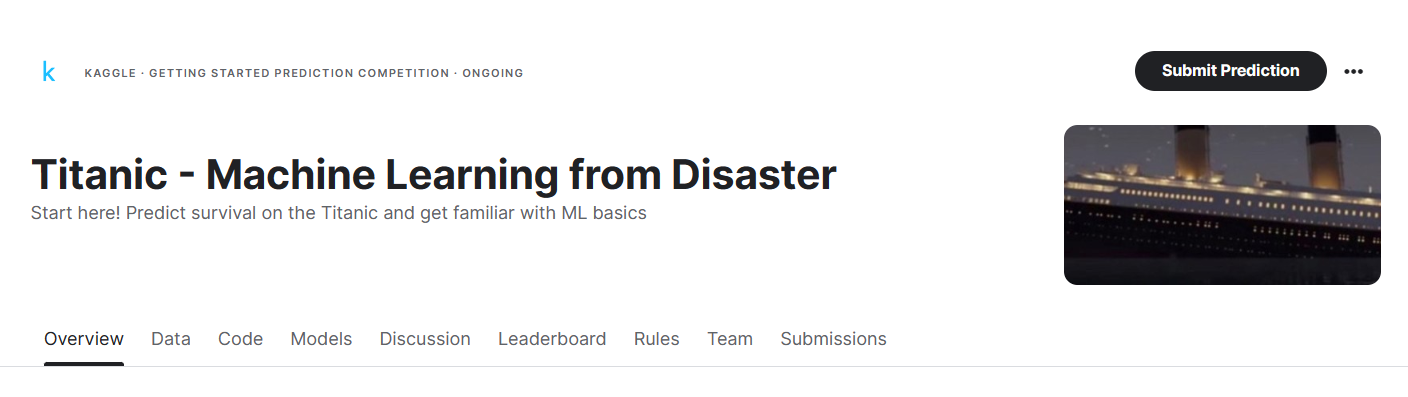
https://www.kaggle.com/competitions/titanic/data

In [1]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
#importamos la librerias
import tensorflow as tf
import pandas as pd
import sklearn as sk

In [50]:
train_dir = '/content/train.csv'
test_dir = '/content/test.csv'

train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
#Analizamos la columna Cabin
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [54]:
# lo mismo para la columna Embarked
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [55]:
# Reemplazar NaN por una cadena de texto representativa (por ejemplo, 'Unknown')
train['Embarked'].fillna('Unknown', inplace=True)
train['Cabin'].fillna('Unknown', inplace=True)

In [56]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
from sklearn.impute import SimpleImputer

# Suponiendo que 'train' es tu DataFrame
numeric_columns = ['Age']  # Lista de columnas numéricas con valores faltantes
imputer = SimpleImputer(strategy='mean')  # Estrategia de imputación: usar la media

# Aplicar la imputación a las columnas numéricas con valores faltantes
train[numeric_columns] = imputer.fit_transform(train[numeric_columns])


In [58]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [59]:
# Como PassengerId no es una caracateristica las quitamos
train = train.drop(columns=['PassengerId'])

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Definimos la columna de caracteristicas

In [61]:
feature_columns = []

# numeric cols
for header in ['Pclass', 'Age', 'SibSp','Parch','Fare']:
  feature_columns.append(tf.feature_column.numeric_column(header))

# bucketized cols
pclas = tf.feature_column.numeric_column('Pclass')
pclas_buckets = tf.feature_column.bucketized_column(pclas, boundaries=[1, 2, 3, 4])
feature_columns.append(pclas_buckets)

# indicator_columns
indicator_column_names = ['Sex', 'Embarked', 'Cabin']
for col_name in indicator_column_names:
  categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(
      col_name, train[col_name].unique())
  indicator_column = tf.feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

# embedding columns
breed1 = tf.feature_column.categorical_column_with_vocabulary_list(
      'Name', train.Name.unique())
breed1_embedding = tf.feature_column.embedding_column(breed1, dimension=8)
feature_columns.append(breed1_embedding)

# crossed columns
animal_type = tf.feature_column.categorical_column_with_vocabulary_list(
      'Sex', ['male', 'female'])
age_type_feature = tf.feature_column.crossed_column([pclas_buckets, animal_type], hash_bucket_size=100)
feature_columns.append(tf.feature_column.indicator_column(age_type_feature))

In [62]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [63]:
# Método de utilidad para crear un conjunto de datos tf.data a partir de un marco de datos de Pandas
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Survived')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [64]:
# separamos train en train y validation
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2)

In [65]:
print(len(train))
print(len(val))

712
179


In [66]:
batch_size = 32
# Convertir el DataFrame 'train' a un conjunto de datos (dataset) para entrenamiento,
# utilizando una función df_to_dataset, con un tamaño de lote (batch size) de 32.
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)

In [21]:
train_ds

<_BatchDataset element_spec=({'Pclass': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SibSp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Ticket': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cabin': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Embarked': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [69]:
model = tf.keras.Sequential([
  feature_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=20)

Epoch 1/20
23/23 [==============================] - 2s 19ms/step - loss: 0.9305 - accuracy: 0.6025 - val_loss: 0.5282 - val_accuracy: 0.7765
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.6657 - val_loss: 0.5422 - val_accuracy: 0.7207
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 0.6896 - val_loss: 0.5670 - val_accuracy: 0.7542
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7444 - val_loss: 0.4579 - val_accuracy: 0.8045
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.7781 - val_loss: 0.4526 - val_accuracy: 0.7933
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8090 - val_loss: 0.4312 - val_accuracy: 0.8101
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8076 - val_loss: 0.4441 - val_accuracy: 0.7765
Epoch 8/20
23/23 [=

In [71]:
loss, accuracy = model.evaluate(val_ds)
print("Accuracy", accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.8122 - accuracy: 0.6648
Accuracy 0.6648044586181641


In [91]:
test = pd.read_csv(test_dir)

In [93]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
# prompt: como puedo hacer la prediccion en base al test. csv

test_df = test.copy()
test_df = test_df.drop(columns=['PassengerId'])
test_df['Embarked'].fillna('Unknown', inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)
test_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [83]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S


In [88]:
# Crear un conjunto de datos directamente desde el DataFrame de prueba
test_ds = tf.data.Dataset.from_tensor_slices(dict(test_df))
batch_size = 32  # Puedes ajustar el tamaño del lote según tu necesidad
test_ds = test_ds.batch(batch_size)

In [87]:
test_ds

<_TensorSliceDataset element_spec={'Pclass': TensorSpec(shape=(), dtype=tf.int64, name=None), 'Name': TensorSpec(shape=(), dtype=tf.string, name=None), 'Sex': TensorSpec(shape=(), dtype=tf.string, name=None), 'Age': TensorSpec(shape=(), dtype=tf.float64, name=None), 'SibSp': TensorSpec(shape=(), dtype=tf.int64, name=None), 'Parch': TensorSpec(shape=(), dtype=tf.int64, name=None), 'Ticket': TensorSpec(shape=(), dtype=tf.string, name=None), 'Fare': TensorSpec(shape=(), dtype=tf.float64, name=None), 'Cabin': TensorSpec(shape=(), dtype=tf.string, name=None), 'Embarked': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [100]:
loss, accuracy = model.evaluate(val_ds)
print("Accuracy", accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.8122 - accuracy: 0.6648
Accuracy 0.6648044586181641


In [97]:
import numpy as np
predictions = model.predict(test_ds)
predictions = np.round(predictions)
predictions
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.flatten().astype(int)})
output.to_csv('predictions.csv', index=False)

14/14 [==============================] - 0s 2ms/step


In [101]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
